In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/germancredit_data.csv')
display(df.head())

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,property,age,otherplans,housing,cards,job,liable,tele,foreign,rent
0,0,A11,6,terrible,goods/repair,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,foreign,False
1,1,A12,48,poor,goods/repair,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,foreign,False
2,0,A14,12,terrible,edu,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,foreign,False
3,0,A11,42,poor,goods/repair,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,foreign,False
4,1,A11,24,poor,newcar,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,foreign,False


In [5]:
print(data['Default'].value_counts())

Default
0    700
1    300
Name: count, dtype: int64


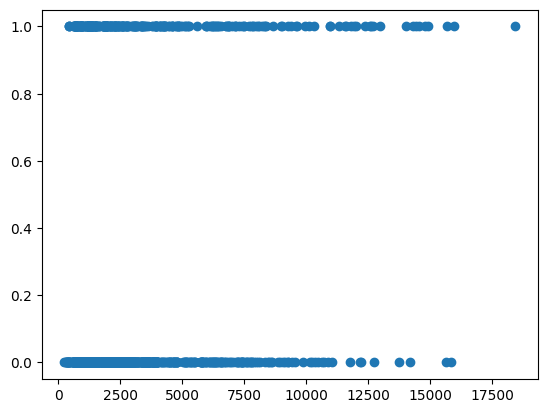

In [8]:
plt.scatter(data['amount'] , data['Default'])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
# Biến phụ thuộc (target variable)
y = df['Default']

# Biến độc lập (independent variables), loại trừ cột 'Default' và 'rent'
X = df.drop(['Default', 'rent'], axis=1)


In [13]:
# Xác định các cột có kiểu dữ liệu 'object' (thường là các biến định danh)
categorical_cols = X.select_dtypes(include=['object']).columns

# Thực hiện mã hóa one-hot cho các cột định danh
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Tập dữ liệu X sau khi mã hóa one-hot (5 hàng đầu tiên):")
display(X_encoded.head())

Tập dữ liệu X sau khi mã hóa one-hot (5 hàng đầu tiên):


,duration,amount,installment,residence,age,cards,liable,checkingstatus1_A12,checkingstatus1_A13,checkingstatus1_A14,...,property_A124,otherplans_A142,otherplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,tele_A192,foreign_german
0,6,1169,4,4,67,2,1,False,False,False,...,False,False,True,True,False,False,True,False,True,False
1,48,5951,2,2,22,1,1,True,False,False,...,False,False,True,True,False,False,True,False,False,False
2,12,2096,2,3,49,1,2,False,False,True,...,False,False,True,True,False,True,False,False,False,False
3,42,7882,2,4,45,1,2,False,False,False,...,False,False,True,False,True,False,True,False,False,False
4,24,4870,3,4,53,2,2,False,False,False,...,True,False,True,False,True,False,True,False,False,False


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Kích thước tập huấn luyện X:", X_train.shape)
print("Kích thước tập kiểm tra X:", X_test.shape)
print("Kích thước tập huấn luyện y:", y_train.shape)
print("Kích thước tập kiểm tra y:", y_test.shape)

Kích thước tập huấn luyện X: (800, 41)
Kích thước tập kiểm tra X: (200, 41)
Kích thước tập huấn luyện y: (800,)
Kích thước tập kiểm tra y: (200,)


In [15]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình hồi quy logistic
model = LogisticRegression(max_iter=1000) # Tăng max_iter để đảm bảo hội tụ

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

print("Mô hình hồi quy logistic đã được huấn luyện.")

Mô hình hồi quy logistic đã được huấn luyện.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.metrics import accuracy_score

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)

print(f"Độ chính xác của mô hình trên tập kiểm tra: {accuracy:.4f}")

Độ chính xác của mô hình trên tập kiểm tra: 0.7950


Không chọn rent có lẻ vì rent có tương quan cao với biến nào đó khác dẫn tới đa cộng tuyến


In [23]:
from sklearn.metrics import confusion_matrix

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

print("Ma trận nhầm lẫn:")
display(cm)

Ma trận nhầm lẫn:


array([[126,  15],
       [ 26,  33]])

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình
dt_model = DecisionTreeClassifier(random_state=42)

# Chạy huấn luyện
dt_model.fit(X_train, y_train)

print("Mô hình cây quyết định đã được huấn luyện.")

Mô hình cây quyết định đã được huấn luyện.


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Dự đoán trên tập kiểm tra
y_pred_dt = dt_model.predict(X_test)

# Tính toán độ chính xác
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Độ chính xác của mô hình Cây quyết định trên tập kiểm tra: {accuracy_dt:.4f}")

# Tính toán ma trận nhầm lẫn
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("\nMa trận nhầm lẫn của mô hình Cây quyết định:")
display(cm_dt)

Độ chính xác của mô hình Cây quyết định trên tập kiểm tra: 0.7050

Ma trận nhầm lẫn của mô hình Cây quyết định:


array([[113,  28],
       [ 31,  28]])

In [31]:
from sklearn.ensemble import RandomForestClassifier

# tạo mô hình
rf_model = RandomForestClassifier(random_state=42)

# chạy
rf_model.fit(X_train, y_train)

print("Mô hình rừng ngẫu nhiên đã được huấn luyện.")

Mô hình rừng ngẫu nhiên đã được huấn luyện.


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_model.predict(X_test)

# Tính toán độ chính xác
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Độ chính xác của mô hình Rừng ngẫu nhiên trên tập kiểm tra: {accuracy_rf:.4f}")

# Tính toán ma trận nhầm lẫn
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\nMa trận nhầm lẫn của mô hình Rừng ngẫu nhiên:")
display(cm_rf)

Độ chính xác của mô hình Rừng ngẫu nhiên trên tập kiểm tra: 0.7850

Ma trận nhầm lẫn của mô hình Rừng ngẫu nhiên:


array([[131,  10],
       [ 33,  26]])

In [35]:
from sklearn.preprocessing import StandardScaler

# tạo
scaler = StandardScaler()

# chuẩn hóa bằng trung bình và độ lệch chuẩn
X_train_scaled = scaler.fit_transform(X_train)

# chuẩn hóa dùng chung scaler với train
X_test_scaled = scaler.transform(X_test)

print("Dữ liệu huấn luyện đã được chuẩn hóa:")
display(X_train_scaled[:5])
print("\nDữ liệu kiểm tra đã được chuẩn hóa:")
display(X_test_scaled[:5])

Dữ liệu huấn luyện đã được chuẩn hóa:


array([[ 3.29708155,  1.19991221,  0.03119565,  1.04450868,  2.4061873 ,
         1.01777726, -0.40973554, -0.60430763, -0.25543363, -0.82289054,
         0.78912487, -0.64298333, -0.24124895, -0.98265048, -0.55809982,
        -0.34251779, -0.33794397, -0.27435163, -0.226381  , -0.47841263,
        -0.44855457, -0.71374643, -0.46056619,  1.72058015, -0.68205679,
         0.90453403, -0.31448545, -0.21068086, -0.24699789, -0.55424682,
        -0.7117523 ,  2.34607439, -0.21389632,  0.46852129,  0.62941287,
        -0.34931309, -0.48038446,  0.76430257, -0.43643578,  1.1751393 ,
        -0.19044535],
       [-0.00805096, -0.35962991, -0.86010854, -1.67144022, -0.22436411,
        -0.71093146, -0.40973554, -0.60430763,  3.91491132, -0.82289054,
        -1.26722657,  1.55525028,  4.14509568, -0.98265048, -0.55809982,
        -0.34251779, -0.33794397, -0.27435163, -0.226381  , -0.47841263,
         2.22938316, -0.71374643, -0.46056619, -0.58119931, -0.68205679,
        -1.1055416 , -0.31448


Dữ liệu kiểm tra đã được chuẩn hóa:


array([[-0.26229193, -0.05890793, -0.86010854, -0.76612392, -1.01352954,
        -0.71093146, -0.40973554, -0.60430763, -0.25543363, -0.82289054,
         0.78912487, -0.64298333, -0.24124895,  1.01765584, -0.55809982,
        -0.34251779, -0.33794397, -0.27435163, -0.226381  , -0.47841263,
        -0.44855457,  1.4010578 , -0.46056619, -0.58119931,  1.46615357,
        -1.1055416 , -0.31448545, -0.21068086, -0.24699789, -0.55424682,
        -0.7117523 , -0.42624394, -0.21389632,  0.46852129,  0.62941287,
        -0.34931309, -0.48038446,  0.76430257, -0.43643578, -0.85096294,
        -0.19044535],
       [-0.26229193,  0.35195218,  0.03119565,  1.04450868, -0.04899402,
        -0.71093146,  2.44059864, -0.60430763, -0.25543363, -0.82289054,
         0.78912487, -0.64298333, -0.24124895, -0.98265048,  1.79179416,
        -0.34251779,  2.95907039, -0.27435163, -0.226381  , -0.47841263,
        -0.44855457,  1.4010578 , -0.46056619, -0.58119931, -0.68205679,
         0.90453403, -0.31448

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Tạo
knn_model = KNeighborsClassifier()

# chạy
knn_model.fit(X_train_scaled, y_train)

print("Mô hình KNN Classification đã được huấn luyện.")

Mô hình KNN Classification đã được huấn luyện.


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Dự đoán trên tập kiểm tra đã được chuẩn hóa
y_pred_knn = knn_model.predict(X_test_scaled)

# Tính toán độ chính xác
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Độ chính xác của mô hình KNN Classification trên tập kiểm tra: {accuracy_knn:.4f}")

# Tính toán ma trận nhầm lẫn
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("\nMa trận nhầm lẫn của mô hình KNN Classification:")
display(cm_knn)

Độ chính xác của mô hình KNN Classification trên tập kiểm tra: 0.7250

Ma trận nhầm lẫn của mô hình KNN Classification:


array([[121,  20],
       [ 35,  24]])